In [325]:
import catboost as cb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from category_encoders.cat_boost import CatBoostEncoder

pd.set_option("mode.copy_on_write", True)

In [326]:
df = pd.read_csv("data/InsNova_data_2023_train.csv")
df.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22619 non-null  int64  
 1   veh_value              22619 non-null  float64
 2   exposure               22619 non-null  float64
 3   veh_body               22619 non-null  object 
 4   veh_age                22619 non-null  int64  
 5   gender                 22619 non-null  object 
 6   area                   22619 non-null  object 
 7   agecat                 22619 non-null  int64  
 8   engine_type            22619 non-null  object 
 9   max_power              22619 non-null  int64  
 10  driving_history_score  22619 non-null  float64
 11  veh_color              22619 non-null  object 
 12  marital_status         22619 non-null  object 
 13  e_bill                 22619 non-null  int64  
 14  time_of_week_driven    22619 non-null  object 
 15  ti

In [328]:
df["high_education_ind"] = df["high_education_ind"].astype("int64")
# df["high_education_ind"] = df["high_education_ind"].astype("category")

In [330]:
# exposure, age_cat, veh_value, veh_value_age, veh_age, driving_history_score, area, veh_value_area, credit_score, trm_length
categorical_features = [
    # "veh_body",
    "veh_age",
    # "gender",
    "area",
    "agecat",
    # "engine_type",
    # "veh_color",
    # "marital_status",
    # "time_of_week_driven",
    # "time_driven",
    # "e_bill",
    "trm_len",
    # "high_education_ind",
]

In [331]:
for col in categorical_features:
    df[col] = df[col].astype("category")

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     22619 non-null  int64   
 1   veh_value              22619 non-null  float64 
 2   exposure               22619 non-null  float64 
 3   veh_body               22619 non-null  object  
 4   veh_age                22619 non-null  category
 5   gender                 22619 non-null  object  
 6   area                   22619 non-null  category
 7   agecat                 22619 non-null  category
 8   engine_type            22619 non-null  object  
 9   max_power              22619 non-null  int64   
 10  driving_history_score  22619 non-null  float64 
 11  veh_color              22619 non-null  object  
 12  marital_status         22619 non-null  object  
 13  e_bill                 22619 non-null  int64   
 14  time_of_week_driven    22619 non-null 

In [333]:
# Initialize CatBoostEncoder for individual features
# veh_value:veh_age
veh_age_encoder = CatBoostEncoder()
df["veh_value_age"] = veh_age_encoder.fit_transform(df["veh_age"], df["veh_value"])

print(df["veh_value_age"])

0        1.868948
1        1.868948
2        3.159474
3        1.319474
4        1.039649
           ...   
22614    2.297208
22615    0.997373
22616    2.934803
22617    2.297466
22618    0.997336
Name: veh_value_age, Length: 22619, dtype: float64


In [334]:
veh_area_encoder2 = CatBoostEncoder()
df["veh_value_area"] = veh_area_encoder2.fit_transform(df["area"], df["veh_value"])
print(df["veh_value_area"])

0        1.868948
1        1.868948
2        3.159474
3        3.739649
4        2.924737
           ...   
22614    1.708119
22615    1.758758
22616    1.758616
22617    1.872403
22618    1.758643
Name: veh_value_area, Length: 22619, dtype: float64


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     22619 non-null  int64   
 1   veh_value              22619 non-null  float64 
 2   exposure               22619 non-null  float64 
 3   veh_body               22619 non-null  object  
 4   veh_age                22619 non-null  category
 5   gender                 22619 non-null  object  
 6   area                   22619 non-null  category
 7   agecat                 22619 non-null  category
 8   engine_type            22619 non-null  object  
 9   max_power              22619 non-null  int64   
 10  driving_history_score  22619 non-null  float64 
 11  veh_color              22619 non-null  object  
 12  marital_status         22619 non-null  object  
 13  e_bill                 22619 non-null  int64   
 14  time_of_week_driven    22619 non-null 

In [158]:
# maybe do this if i have time, idea is to offset exposure using target variable
# print(df["exposure"].min())
# log exposure
# df["exposure"] = np.log(df["exposure"])
# print(df["exposure"].min())
# print(df["exposure"].max())

0.001753897
-6.345915109675446
-0.0006224576865964636


In [337]:
# exposure, age_cat, veh_value, veh_value_age, veh_age, driving_history_score, area, veh_value_area, credit_score, trm_length

X = df.drop(
    columns=[
        "id",
        "clm",
        "numclaims",
        "claimcst0",
        "veh_body",
        "engine_type",
        "veh_color",
        "marital_status",
        "time_driven",
        "e_bill",
        # "veh_value",
        "max_power",
        "time_of_week_driven",
        "high_education_ind",
        "gender",
    ]
)  # assuming 'claimcst0' is your target variable
print(X.columns)
y = df["claimcst0"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Index(['veh_value', 'exposure', 'veh_age', 'area', 'agecat',
       'driving_history_score', 'trm_len', 'credit_score', 'veh_value_age',
       'veh_value_area'],
      dtype='object')


In [338]:
from sklearn.metrics import make_scorer


def calculate_gini(y_train, y_test):
    df = pd.DataFrame({"Actual_Claim_Cost": y_train, "Predicted_Claim_Cost": y_test})
    df = df.sort_values(by="Predicted_Claim_Cost", ascending=False)
    df["Gini_Index"] = (
        df["Actual_Claim_Cost"].cumsum() / df["Actual_Claim_Cost"].sum()
    ) - np.arange(1, len(df) + 1) / len(df)
    return df["Gini_Index"].sum()


def normalized_gini(y_train, y_test):
    return calculate_gini(y_train, y_test) / calculate_gini(y_train, y_train)


# Make a scorer with greater_is_better set to True since higher Gini values are better
# not needed just put here for reference later
gini_scorer = make_scorer(normalized_gini, greater_is_better=True)

In [339]:
cat_model = cb.CatBoostRegressor(cat_features=categorical_features)

In [340]:
param_grid = {
    "depth": [2, 3, 4, 5],
    "learning_rate": [0.01, 0.02, 0.03],
    "iterations": [500, 1000, 1500],
    "loss_function": [
        "Tweedie:variance_power=1.1",
        "Tweedie:variance_power=1.2",
        "Tweedie:variance_power=1.3",
        "Tweedie:variance_power=1.4",
        "Tweedie:variance_power=1.5",
        "Tweedie:variance_power=1.6",
        "Tweedie:variance_power=1.7",
        "Tweedie:variance_power=1.8",
        "Tweedie:variance_power=1.9",
    ],
    "logging_level": ["Silent"],
}

In [341]:
# Using Grid Search
# Use neg mean absolute error as the metric for tweedie according to paper
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    cv=5,
    # scoring="neg_mean_squared_error",
    scoring=gini_scorer,
)

# Or using Random Search
# random_search = RandomizedSearchCV(estimator=cat_model, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=50, random_state=42)

# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x2bc690950>,
             param_grid={'depth': [2, 3, 4, 5], 'iterations': [500, 1000, 1500],
                         'learning_rate': [0.01, 0.02, 0.03],
                         'logging_level': ['Silent'],
                         'loss_function': ['Tweedie:variance_power=1.1',
                                           'Tweedie:variance_power=1.2',
                                           'Tweedie:variance_power=1.3',
                                           'Tweedie:variance_power=1.4',
                                           'Tweedie:variance_power=1.5',
                                           'Tweedie:variance_power=1.6',
                                           'Tweedie:variance_power=1.7',
                                           'Tweedie:variance_power=1.8',
                                           'Tweedie:variance_power=1.9']},
             scoring=make_scorer(normalized_gini))

In [343]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
best_model.score(X_test, y_test)  # You can use other metrics as needed

Best parameters: {'depth': 5, 'iterations': 1000, 'learning_rate': 0.02, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.5'}


0.0004170330601939165

In [344]:
x_train = df.drop(
    columns=[
        "id",
        "clm",
        "numclaims",
        "claimcst0",
        "veh_body",
        "engine_type",
        "veh_color",
        "marital_status",
        "time_driven",
        "e_bill",
        # "veh_value",
        "max_power",
        "time_of_week_driven",
        "high_education_ind",
        "gender",
    ]
)
y_train = df["claimcst0"]

In [345]:
train_data = Pool(data=x_train, label=y_train, cat_features=categorical_features)

In [347]:
# Define the model parameters
# Best parameters: {'depth': 4, 'iterations': 1000, 'learning_rate': 0.01, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.5'}
# Best parameters: {'depth': 3, 'iterations': 500, 'learning_rate': 0.01, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.7'}
# Best parameters: {'depth': 6, 'iterations': 1500, 'learning_rate': 0.1, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.8'}
# Best parameters: {'depth': 3, 'iterations': 1000, 'learning_rate': 0.01, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.5'}
# For 10 features
# Best parameters: {'depth': 3, 'iterations': 500, 'learning_rate': 0.01, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.2'}
# Best parameters: {'depth': 3, 'iterations': 1000, 'learning_rate': 0.01, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.5'}
# Best parameters: {'depth': 5, 'iterations': 1000, 'learning_rate': 0.02, 'logging_level': 'Silent', 'loss_function': 'Tweedie:variance_power=1.5'}

model = CatBoostRegressor(
    iterations=1000,
    depth=5,
    learning_rate=0.02,
    loss_function="Tweedie:variance_power=1.2",
)

# Train the regression model
model.fit(train_data)

0:	learn: 800.9252035	total: 4.6ms	remaining: 4.6s
1:	learn: 785.7121696	total: 9.15ms	remaining: 4.57s
2:	learn: 770.8530509	total: 13.6ms	remaining: 4.51s
3:	learn: 756.3428162	total: 17.7ms	remaining: 4.42s
4:	learn: 742.1779752	total: 20.9ms	remaining: 4.15s
5:	learn: 728.3511466	total: 24.6ms	remaining: 4.07s
6:	learn: 714.8605740	total: 28ms	remaining: 3.97s
7:	learn: 701.6980462	total: 32.3ms	remaining: 4.01s
8:	learn: 688.8827991	total: 34.4ms	remaining: 3.79s
9:	learn: 676.4004921	total: 36.4ms	remaining: 3.61s
10:	learn: 664.2463737	total: 41.5ms	remaining: 3.73s
11:	learn: 652.3994632	total: 45.9ms	remaining: 3.78s
12:	learn: 640.8956754	total: 51.6ms	remaining: 3.91s
13:	learn: 629.7209343	total: 54.6ms	remaining: 3.84s
14:	learn: 618.8696486	total: 56.8ms	remaining: 3.73s
15:	learn: 608.3104615	total: 61.1ms	remaining: 3.76s
16:	learn: 598.0725677	total: 64.5ms	remaining: 3.73s
17:	learn: 588.1755230	total: 67.4ms	remaining: 3.68s
18:	learn: 578.5737132	total: 71.5ms	remai

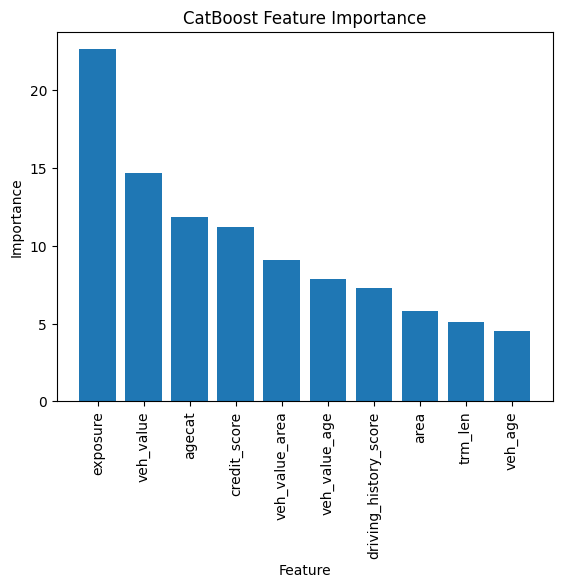

In [348]:
# import mathplotlib plot
import matplotlib.pyplot as plt

feature_importance = model.get_feature_importance()
feature_names = x_train.columns


# Sort feature importance in descending order
sorted_idx = feature_importance.argsort()[::-1]

# Plot the features and their importances
plt.bar(range(len(feature_names)), feature_importance[sorted_idx])
plt.xticks(
    range(len(feature_names)),
    [feature_names[i] for i in sorted_idx],
    rotation="vertical",
)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("CatBoost Feature Importance")
plt.show()

# final varaibles:
# exposure, age_cat, veh_value, veh_value_age, veh_age, driving_history_score, area, veh_value_area, credit_score, trm_length

In [ ]:
y_pred = model.predict(x_train)
check = normalized_gini(y_train, y_pred)
print(check)

In [349]:
test = pd.read_csv("data/InsNova_data_2023_vh.csv")

In [350]:
test["high_education_ind"] = test["high_education_ind"].astype("int64")
# test["high_education_ind"] = test["high_education_ind"].astype("category")

In [351]:
for col in categorical_features:
    test[col] = test[col].astype("category")

In [353]:
x_test = test.drop(
    columns=[
        "id",
        "veh_body",
        "engine_type",
        "veh_color",
        "marital_status",
        "time_driven",
        "e_bill",
        # "veh_value",
        "max_power",
        "time_of_week_driven",
        "high_education_ind",
        "gender",
    ]
)

In [354]:
veh_age_encoder = CatBoostEncoder()
x_test["veh_value_age"] = veh_age_encoder.fit_transform(
    x_test["veh_age"], x_test["veh_value"]
)
print(df["veh_value_age"])
veh_area_encoder2 = CatBoostEncoder()
x_test["veh_value_area"] = veh_area_encoder2.fit_transform(
    x_test["area"], x_test["veh_value"]
)
print(df["veh_value_area"])

0        1.868948
1        1.868948
2        3.159474
3        1.319474
4        1.039649
           ...   
22614    2.297208
22615    0.997373
22616    2.934803
22617    2.297466
22618    0.997336
Name: veh_value_age, Length: 22619, dtype: float64
0        1.868948
1        1.868948
2        3.159474
3        3.739649
4        2.924737
           ...   
22614    1.708119
22615    1.758758
22616    1.758616
22617    1.872403
22618    1.758643
Name: veh_value_area, Length: 22619, dtype: float64


In [355]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22620 entries, 0 to 22619
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   veh_value              22620 non-null  float64 
 1   exposure               22620 non-null  float64 
 2   veh_age                22620 non-null  category
 3   area                   22620 non-null  category
 4   agecat                 22620 non-null  category
 5   driving_history_score  22620 non-null  int64   
 6   trm_len                22620 non-null  category
 7   credit_score           22620 non-null  float64 
 8   veh_value_age          22620 non-null  float64 
 9   veh_value_area         22620 non-null  float64 
dtypes: category(4), float64(5), int64(1)
memory usage: 1.1 MB


In [357]:
# Make predictions on the test set
y_pred = model.predict(x_test)
test["Predict"] = y_pred

In [358]:
submission = test[["id", "Predict"]]
submission

,id,Predict
0,1,102.430934
1,2,70.690554
2,3,58.720931
3,4,181.013102
4,5,84.157156
...,...,...
22615,22616,91.455340
22616,22617,42.347672
22617,22618,185.971184
22618,22619,176.318600


In [196]:
submission.to_csv("catboost_submission.csv", index=False)